# Task 1 - Stock Prediction

*Varad Deshmukh*

**Instructions** : Take stock price of any company you
want and predicts its price by using LSTM. Use only Jupyter notebook code.

> ## The LSTM Network

Long Short Term Memory (LSTM) are a kind of Recurrent Neural Network for learning long-term dependencies. It is commonly used for time-series data. They have four interacting layers, each employing a sigmoid function and a tanh function.

In this project, we will build a LSTM model to predict the stock prices of Google.

> ## Importing the libraries

In [17]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

> ## Loading the training dataset

The Google training data has the stock price data from Jan 3, 2012 to Dec 30, 2016, in a csv file named `Google_Stock_Price_Train.csv`. We load it into a `pandas.DataFrame`

In [18]:
# load the data
stock_train = pd.read_csv('Google_Stock_Price_Train.csv')
stock_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


We will be using the opening stock price column to train our model, so let us separate it out.

In [19]:
# separate opening price to train the model
train = stock_train.iloc[:, 1:2].values

Out data has values ranging widely. For efficient training, it is advisable to normalize the data into the range 0 to 1. We do this next,

In [20]:
# normalization
scaler = MinMaxScaler(feature_range =(0,1))
scaled_train = scaler.fit_transform(train)

Now, we separate the training data into features and target for modelling purposes, and then reshape them appropriately.

In [21]:
# separate the training data into features and target
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(scaled_train[i-60:i, 0])
    y_train.append(scaled_train[i, 0])

X_train = np.array(X_train)
y_train = np.array(y_train)

In [22]:
# reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1198, 60, 1)

> ## Building the LSTM Neural Network

We build the network architecture using the layers as imported from `keras` earlier. We use the `Sequential()` class in `keras` to create the neural network.

In [23]:
# building the neural network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

> ## Implementing the model

It is a two-step process :
1. Compiling the model using `compile()` method
2. Training the model using `fit()` method

In [24]:
# fitting the model
model.compile(optimizer='adam', 
             loss='mean_squared_error')

model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 21s 132ms/step - loss: 0.0372
Epoch 2/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0063
Epoch 3/100
38/38 [==============================] - 8s 208ms/step - loss: 0.0055
Epoch 4/100
38/38 [==============================] - 8s 208ms/step - loss: 0.0052
Epoch 5/100
38/38 [==============================] - 7s 193ms/step - loss: 0.0052
Epoch 6/100
38/38 [==============================] - 5s 133ms/step - loss: 0.0046
Epoch 7/100
38/38 [==============================] - 7s 181ms/step - loss: 0.0047
Epoch 8/100
38/38 [==============================] - 5s 142ms/step - loss: 0.0044
Epoch 9/100
38/38 [==============================] - 5s 126ms/step - loss: 0.0041
Epoch 10/100
38/38 [==============================] - 5s 138ms/step - loss: 0.0046
Epoch 11/100
38/38 [==============================] - 6s 146ms/step - loss: 0.0038
Epoch 12/100
38/38 [==============================] - 5s 125ms/step - loss: 0.0047
Epoch 13/100

> ## Model Predictions

We now validate the model by making it predict the stock prices for January 2017, the actual stock price data of which we have in another csv file `Google_Stock_Price_Test.csv`. We load it into a `DataFrame`, prepare the inputs for the model in proper shape and have the model predict the prices.

In [25]:
# extract price of January 2017 as test data for validation
stock_test = pd.read_csv('Google_Stock_Price_Test.csv')
stock_actual = stock_test.iloc[:, 1:2].values

In [26]:
# preparing input for model
stock = pd.concat((stock_train['Open'], stock_test['Open']), axis=0)
inputs = stock[len(stock) - len(stock_test)-60:].values
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [27]:
# predicting prices for Jan 2017
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

1/1 [==============================] - 3s 3s/step


Having gathered the stock price predictions of our model for the month of January 2017, let us now plot them together with the actual stock prices to see the comparison.

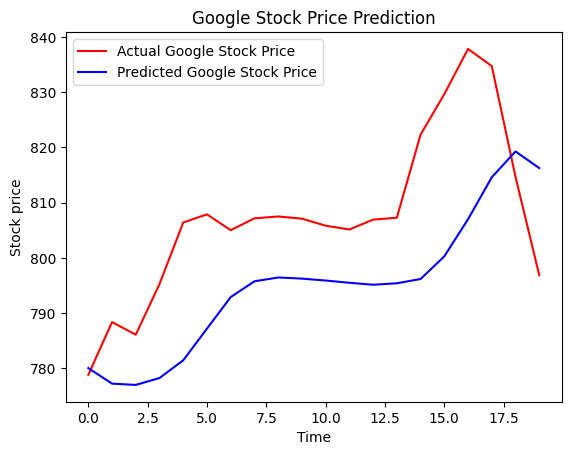

In [28]:
# actual prices vs. predicted prices
plt.plot(stock_actual, 
         color='red', 
         label='Actual Google Stock Price')
plt.plot(predictions, 
         color='blue', 
         label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock price')
plt.legend()

Thus, our LSTM model has been able to predict the general pattern of stock prices.